In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 402s 2us/step


Example training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


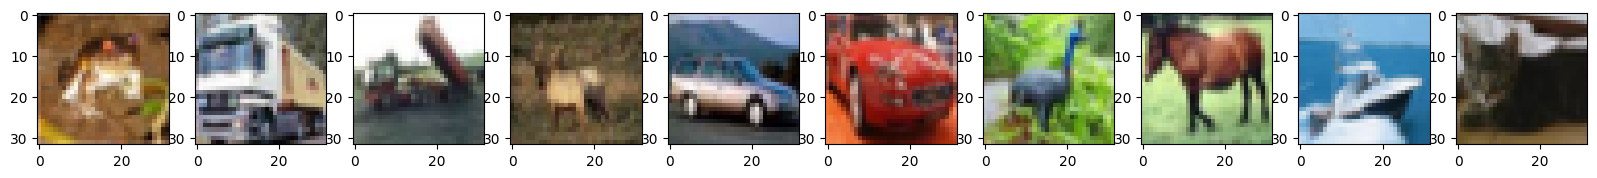

In [8]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:10]])) 
print('Corresponding classes for the labels: ' + str([cifar10_classes[x[0]] for x in y_train[0:10]]))

fig, axarr = plt.subplots(1, 10)
fig.set_size_inches(20, 6)

for i in range(10):
    image = x_train[i]
    axarr[i].imshow(image)
plt.show()


In [9]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [10]:
X_train = x_train / 255
X_test = x_test / 255

In [11]:
num_classes =10
Y_train = np_utils.to_categorical(y_train,num_classes =10)
Y_test = np_utils.to_categorical(y_test, num_classes= 10)

In [12]:
print("Train data shapes")
print(X_train.shape)
print(Y_train.shape)
print("Test data shapes")
print(X_test.shape)
print(Y_test.shape)

Train data shapes
(50000, 32, 32, 3)
(50000, 10)
Test data shapes
(10000, 32, 32, 3)
(10000, 10)


In [13]:
# Add 1 Initialize sequential model
model = Sequential()
# Add 2 convolutional layers
model.add(Conv2D(32, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))
model.add(Conv2D(32, kernel_size = (3,3), strides=(1,1), padding='same', activation= 'relu'))
# Add maxpool layer
model.add(MaxPool2D(pool_size= (2,2)))

# Add flatten layer
model.add(Flatten())
# Add Dense layers for hidden and output

model.add(Dense(256, activation= 'relu'))
model.add(Dense(num_classes,activation= 'softmax'))

In [14]:
# Have a look at the summary of constructed CNN model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                        

In [15]:
# compile the model
model.compile(loss= 'categorical_crossentropy', metrics= ['accuracy'], optimizer= 'adam')

In [16]:
# Train the CNN model
Info = model.fit(X_train, Y_train, batch_size= 128, epochs= 10, verbose=2, validation_split= 0.2)

Epoch 1/10
313/313 - 32s - loss: 1.5613 - accuracy: 0.4421 - val_loss: 1.2716 - val_accuracy: 0.5585 - 32s/epoch - 102ms/step
Epoch 2/10
313/313 - 6s - loss: 1.1280 - accuracy: 0.6038 - val_loss: 1.1070 - val_accuracy: 0.6171 - 6s/epoch - 19ms/step
Epoch 3/10
313/313 - 6s - loss: 0.9615 - accuracy: 0.6650 - val_loss: 1.0305 - val_accuracy: 0.6407 - 6s/epoch - 19ms/step
Epoch 4/10
313/313 - 7s - loss: 0.8357 - accuracy: 0.7086 - val_loss: 1.0140 - val_accuracy: 0.6508 - 7s/epoch - 21ms/step
Epoch 5/10
313/313 - 8s - loss: 0.7388 - accuracy: 0.7432 - val_loss: 0.9289 - val_accuracy: 0.6774 - 8s/epoch - 25ms/step
Epoch 6/10
313/313 - 7s - loss: 0.6349 - accuracy: 0.7784 - val_loss: 0.9801 - val_accuracy: 0.6757 - 7s/epoch - 21ms/step
Epoch 7/10
313/313 - 6s - loss: 0.5480 - accuracy: 0.8103 - val_loss: 0.9853 - val_accuracy: 0.6780 - 6s/epoch - 18ms/step
Epoch 8/10
313/313 - 6s - loss: 0.4435 - accuracy: 0.8479 - val_loss: 1.0269 - val_accuracy: 0.6832 - 6s/epoch - 18ms/step
Epoch 9/10
31

In [5]:
def plotLosses(Info):  
    plt.plot(Info.history['loss'])
    plt.plot(Info.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()
    

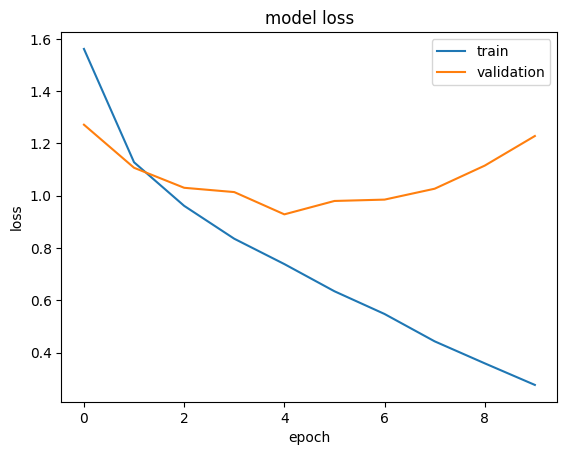

In [18]:
plotLosses(Info)

In [19]:
model= Sequential()
# Add 2 convolution layers
model.add(Conv2D(32,kernel_size= (3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
# Add Dropaut Layer
model.add(Dropout(0.25))

# Add flatten layer
model.add(Flatten())
# Add Dense layers for hidden and output

model.add(Dense(256, activation= 'relu'))
model.add(Dense(num_classes,activation= 'softmax'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                      

In [21]:
model.compile(loss='categorical_crossentropy', metrics= ['accuracy'], optimizer= 'adam')

In [22]:
# Train the CNN model
Info = model.fit(X_train, Y_train, batch_size= 128, epochs= 10, verbose=2, validation_split= 0.2)
     

Epoch 1/10
313/313 - 17s - loss: 1.5761 - accuracy: 0.4344 - val_loss: 1.2465 - val_accuracy: 0.5643 - 17s/epoch - 56ms/step
Epoch 2/10
313/313 - 7s - loss: 1.1559 - accuracy: 0.5931 - val_loss: 1.1002 - val_accuracy: 0.6127 - 7s/epoch - 23ms/step
Epoch 3/10
313/313 - 7s - loss: 0.9901 - accuracy: 0.6518 - val_loss: 1.0038 - val_accuracy: 0.6539 - 7s/epoch - 23ms/step
Epoch 4/10
313/313 - 7s - loss: 0.8860 - accuracy: 0.6908 - val_loss: 0.9477 - val_accuracy: 0.6739 - 7s/epoch - 23ms/step
Epoch 5/10
313/313 - 7s - loss: 0.8011 - accuracy: 0.7195 - val_loss: 0.9464 - val_accuracy: 0.6726 - 7s/epoch - 22ms/step
Epoch 6/10
313/313 - 7s - loss: 0.7207 - accuracy: 0.7477 - val_loss: 0.8898 - val_accuracy: 0.6949 - 7s/epoch - 22ms/step
Epoch 7/10
313/313 - 7s - loss: 0.6506 - accuracy: 0.7721 - val_loss: 0.9279 - val_accuracy: 0.6843 - 7s/epoch - 21ms/step
Epoch 8/10
313/313 - 7s - loss: 0.5784 - accuracy: 0.7982 - val_loss: 0.9169 - val_accuracy: 0.7020 - 7s/epoch - 21ms/step
Epoch 9/10
313

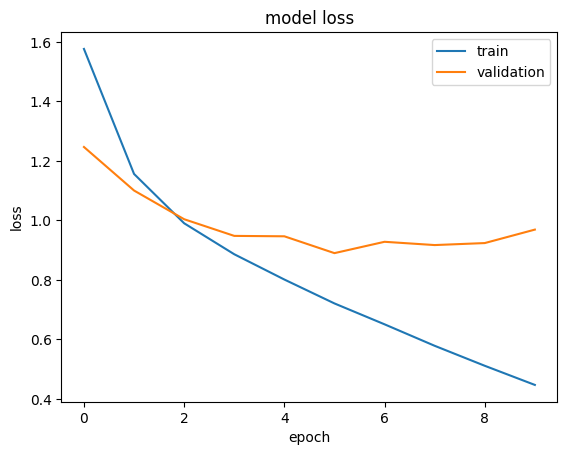

In [23]:
plotLosses(Info)


In [24]:
score = model.evaluate(X_test, Y_test, batch_size=128, verbose=0)

In [25]:
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[0.9857547879219055, 0.6912000179290771]


In [28]:
from keras.models import load_model
model.save('cnn_model.h5')